In [21]:
import pandas as pd
df = pd.read_csv('data/wine_cleared.zip')

In [22]:
df['price_round'] = df['price'].round().astype(int)

In [23]:
regex = '\d{4}' # регулярное выражение для нахождения чисел
df['year'] = df['title'].str.findall(regex).str.get(0)

df['year'] = pd.to_datetime(df['year'], errors = 'coerce')
df['years_diff'] = pd.to_datetime("2022-01-12") - df['year']

In [24]:
#!pip install category_encoders
import category_encoders as ce

In [25]:
encoder = ce.OneHotEncoder(cols=['taster_name'])
type_bin = encoder.fit_transform(df['taster_name'])
df = pd.concat([df, type_bin], axis=1)

In [26]:
df['is_usa'] = df['country'].apply(lambda x: 1 if x == 'US' else 0)
df['is_france'] = df['country'].apply(lambda x: 1 if x == 'France' else 0)
df['is_italy'] = df['country'].apply(lambda x: 1 if x == 'Italy' else 0)

C:\Users\admin\AppData\Local\Temp\ipykernel_11392\3164681159.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<AxesSubplot: >

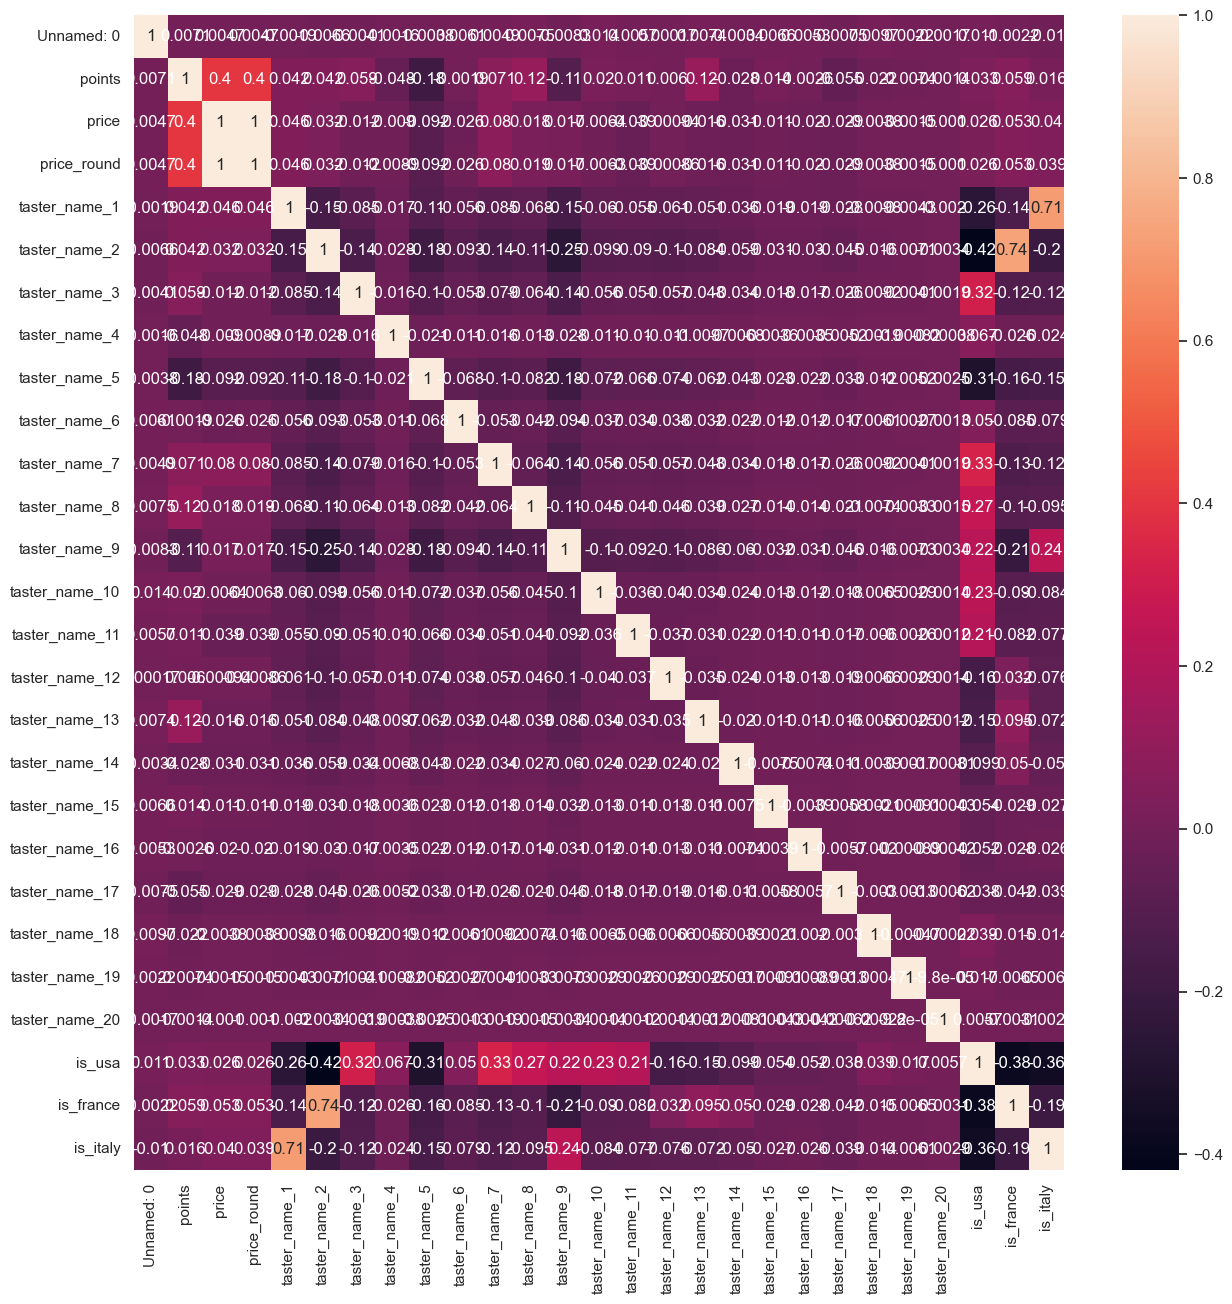

In [29]:
import seaborn as sns
sns.set(rc={'figure.figsize':(15,15)})
sns.heatmap(df.corr(), annot=True)


In [32]:
df.drop(columns=['price', 'taster_name_1', 'taster_name_2'], axis=1, inplace=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_11392\621126171.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<AxesSubplot: >

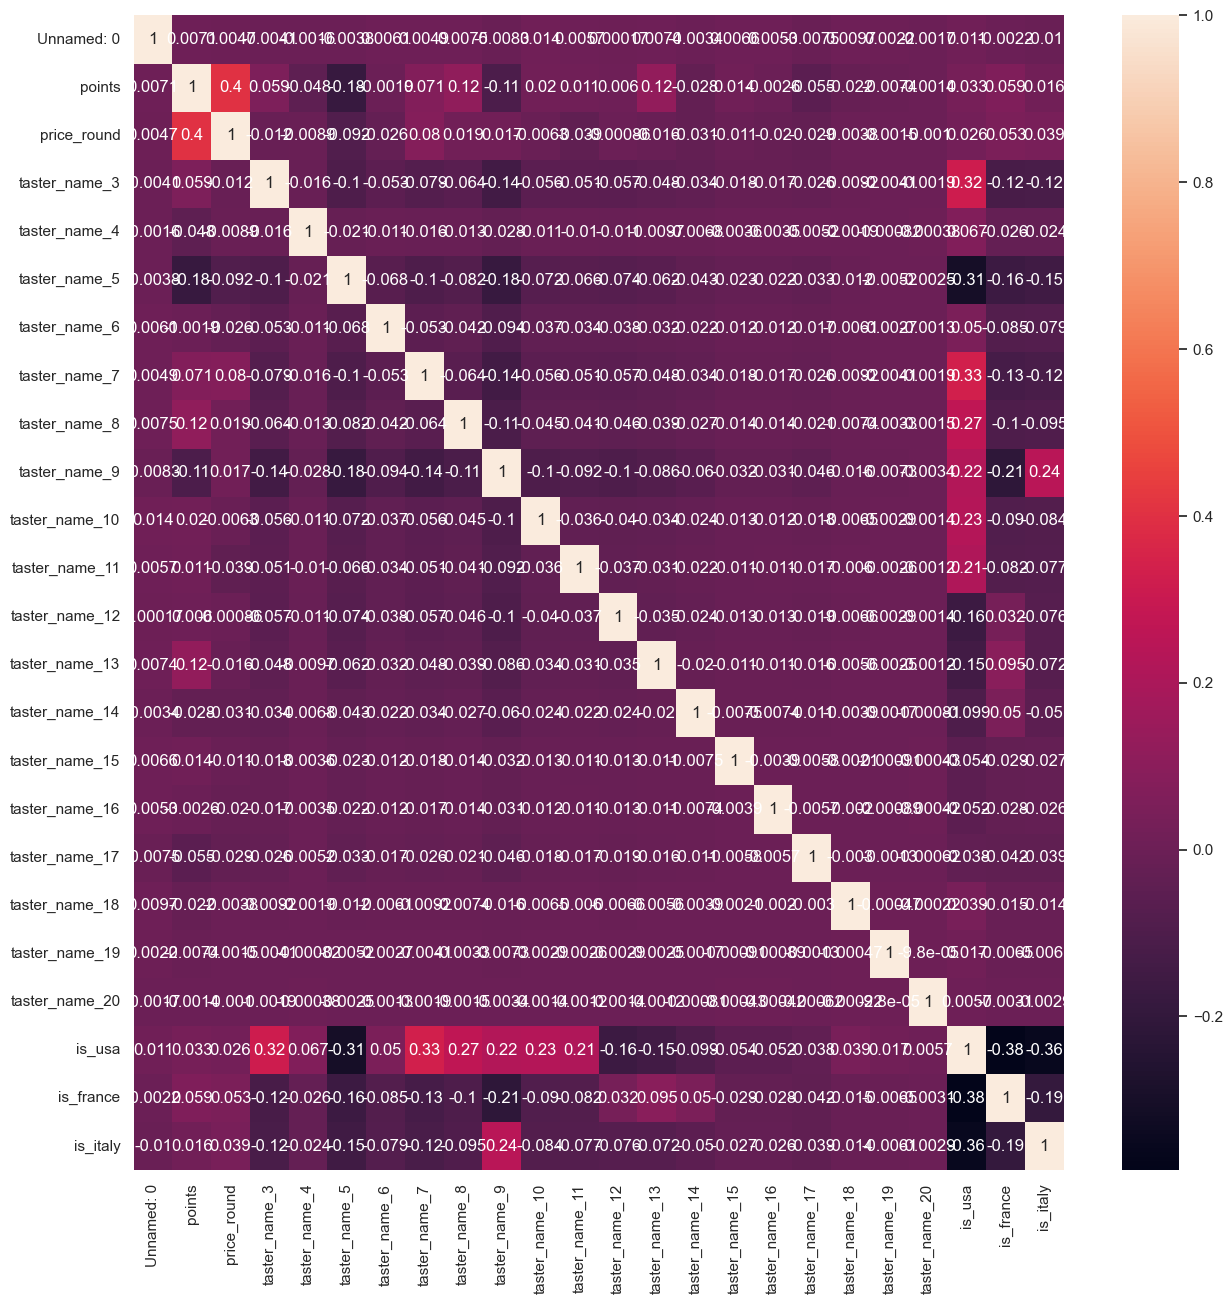

In [33]:
sns.heatmap(df.corr(), annot=True)